In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pyemma
import mdtraj
from pyemma.util.contexts import settings
# import networkx as nx
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Matplotlib settings
fontsize = 11
linewidth = 2
markersize = 2
plt.style.use('seaborn-v0_8-bright')  # Use a predefined style for better aesthetics
# Global settings for matplotlib
matplotlib.rcParams.update({
    'mathtext.fontset': 'stix',
    'font.family': 'Arial',
    'font.size': fontsize,
    'axes.labelsize': 'medium',
    'axes.linewidth': linewidth,
    'lines.markersize': markersize,
    'xtick.major.width': linewidth,
    'ytick.major.width': linewidth,
    # 'xtick.labelsize': 'small',
    # 'ytick.labelsize': 'small',
    'legend.fontsize': 'small',
    # 'figure.dpi': 600,
    'axes.spines.right': False,
    'axes.spines.top': False,
    # 'xtick.major.size': 6,
    # 'ytick.major.size': 6
})

In [3]:
msm_data=np.load('msm_data.npz', allow_pickle=True)

In [4]:
data = msm_data['raw_Q_G']
conc_data=np.concatenate(data)
meta_dtrajs = msm_data['meta_dtrajs']
meta_dtraj_flatten = np.array(meta_dtrajs.flatten(), dtype=int)

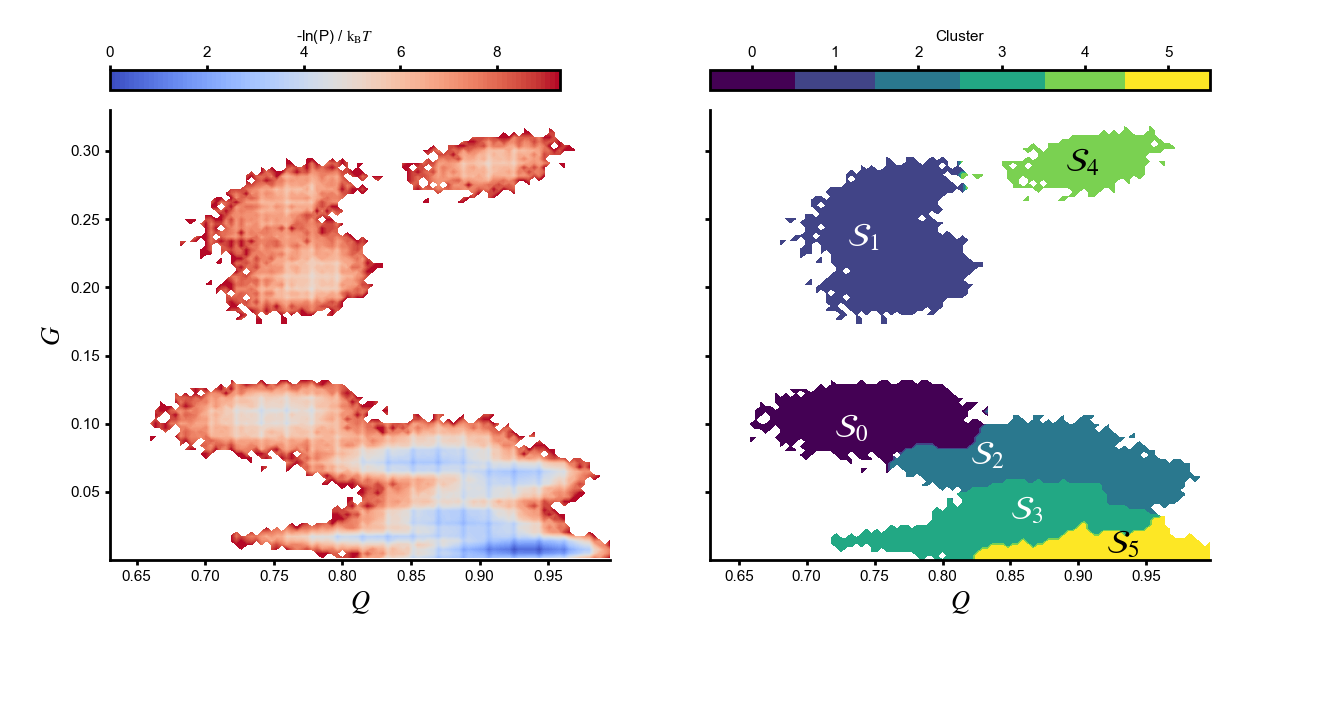

In [5]:
fig = plt.figure(figsize=(13, 7))
gw = int(np.floor(0.5 + 500 * fig.get_figwidth()))
gh = int(np.floor(0.5 + 500 * fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0, left=0.0, right=1.0, bottom=0.0, top=1.0)
ax_box = fig.add_subplot(gs[:, :])
ax_box.set_axis_off()

# Plot FE
ax_fe = fig.add_subplot(gs[500:2750, 500:3000])
_, _, misc = pyemma.plots.plot_free_energy(conc_data[:,0], conc_data[:,1], 
                                        ax=ax_fe,
                                        cax=fig.add_subplot(gs[300:400, 500:2750]),
                                        cbar_orientation='horizontal',
                                        cmap='coolwarm', legacy=False)
misc['cbar'].set_ticks(np.linspace(0, 8, 5))
misc['cbar'].ax.xaxis.set_ticks_position('top')
misc['cbar'].ax.xaxis.set_label_position('top')
misc['cbar'].set_label(r'-ln(P) / $\mathrm{k}_\mathrm{B}T$')
ax_fe.set_ylabel('$G$', fontsize=fontsize+8)
ax_fe.set_xlabel('$Q$', fontsize=fontsize+8)
ax_fe.set_ylim([0.0001, 0.33])
# State map
ax_state = fig.add_subplot(gs[500:2750, 3500:6000])
_,_, misc = pyemma.plots.plot_state_map(conc_data[:,0], conc_data[:,1], meta_dtraj_flatten, 
                                        ax=ax_state,
                                        cax=fig.add_subplot(gs[300:400, 3500:6000]),
                                        cbar_orientation='horizontal')
misc['cbar'].ax.xaxis.set_ticks_position('top')
misc['cbar'].ax.xaxis.set_label_position('top')
misc['cbar'].set_label('Cluster')

ax_state.text(0.72, 0.09, '$\mathcal{S}_0$', size=24, color='white')
ax_state.text(0.73, 0.23, '$\mathcal{S}_1$', size=24, color='white')
ax_state.text(0.82, 0.07, '$\mathcal{S}_2$', size=24, color='white')
ax_state.text(0.85, 0.03, '$\mathcal{S}_3$', size=24, color='white')
ax_state.text(0.89, 0.285, '$\mathcal{S}_4$', size=24)
ax_state.text(0.92, 0.005, '$\mathcal{S}_5$', size=24)
ax_state.set_xlabel('$Q$', fontsize=fontsize+8)
ax_state.set_yticklabels([])

ax_state.set_ylim([0.0001, 0.33])

# ax_state.yaxis.set_tick_params(width=linewidth) # make y-axis tick marks thicker
fig.savefig('State_all.png', dpi=2000)